In [ ]:
#머신러닝 실습 & 오후 딥러닝 진도



In [101]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/milknew.csv", encoding='ISO-8859-1')

df.head()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [103]:
# df['Grade'] = df['Grade'].astype(int)
# grade_mapping = {'high':1, 'medium':2, 'low':3}
# df['Grade'] = df['Grade'].map(grade_mapping)
df[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade']]


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [104]:
data = df[['pH', 'Temprature', 'Taste',	'Odor'	,'Fat ',	'Turbidity',	'Colour']].to_numpy()
target = df['Grade'].to_numpy()
X = data
y = target
print(data.shape)
print(target.shape)
print(target)

(1059, 7)
(1059,)
['high' 'high' 'low' ... 'low' 'high' 'low']


In [105]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data = ss.fit_transform(data)
data[:5]


array([[-0.02153136, -0.91410734,  0.91050291, -0.87296233,  0.69960809,
        -0.98221664,  0.5016002 ],
       [-0.02153136, -0.81503461, -1.09829413,  1.1455248 , -1.4293717 ,
         1.01810533,  0.26933321],
       [ 1.33656414,  2.55343832,  0.91050291,  1.1455248 ,  0.69960809,
         1.01810533, -1.35653574],
       [ 2.05135125, -1.01318008,  0.91050291,  1.1455248 , -1.4293717 ,
         1.01810533,  0.73386719],
       [-0.02153136, -0.71596188, -1.09829413, -0.87296233, -1.4293717 ,
        -0.98221664,  0.73386719]])

Test 정확도: 0.9905660377358491


<ipython-input-107-e9766394f7fe>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


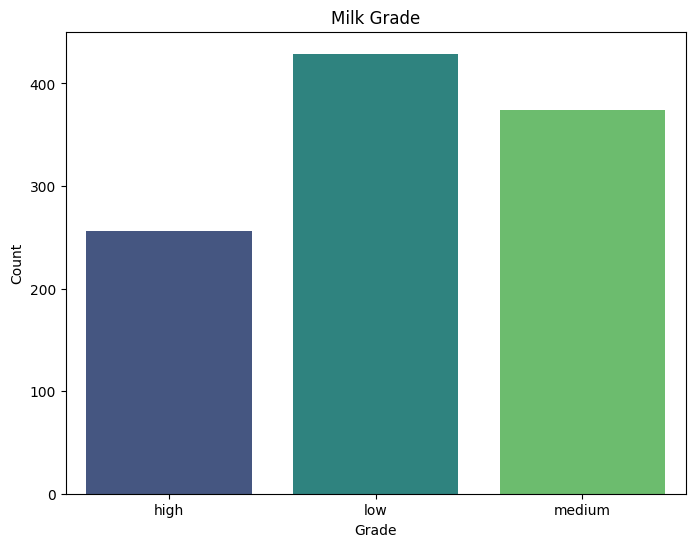

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test 정확도:", accuracy)

plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='viridis')
plt.title('Milk Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data = ss.fit_transform(data)
data[:5]


array([[-0.02153136, -0.91410734,  0.91050291, -0.87296233,  0.69960809,
        -0.98221664,  0.5016002 ],
       [-0.02153136, -0.81503461, -1.09829413,  1.1455248 , -1.4293717 ,
         1.01810533,  0.26933321],
       [ 1.33656414,  2.55343832,  0.91050291,  1.1455248 ,  0.69960809,
         1.01810533, -1.35653574],
       [ 2.05135125, -1.01318008,  0.91050291,  1.1455248 , -1.4293717 ,
         1.01810533,  0.73386719],
       [-0.02153136, -0.71596188, -1.09829413, -0.87296233, -1.4293717 ,
        -0.98221664,  0.73386719]])

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim=7, activation="softmax"))


model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(data, target, epochs=2000, verbose=0)

In [62]:
from sklearn.metrics import accuracy_score

predictions = model.predict(data)
accuracy = accuracy_score(target, predictions.round())
print(f'Test Accuracy: {accuracy}')

34/34 [==============================] - 0s 2ms/step
Test Accuracy: 0.40509915014164305


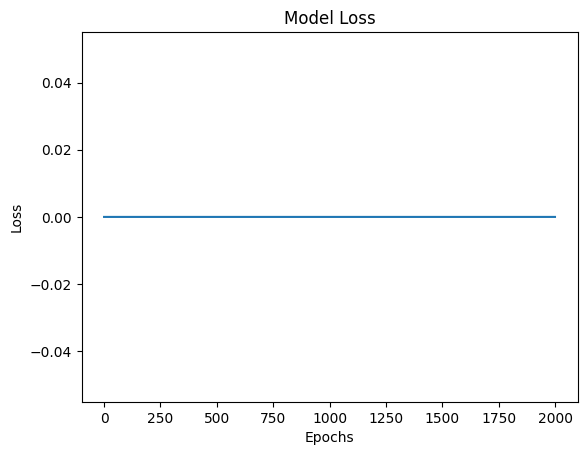

In [63]:
import matplotlib.pyplot as plt

history = model.fit(data, target, epochs=2000, verbose=0)
loss = history.history['loss']

plt.plot(loss)
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()